# SVM加高斯函数解决分类问题_gamma很关键
## 关键使用地模型

```python
from sklearn.svm import SVC # C即Classify
```

## 高斯核函数中的γ
![高斯核函数中的γ](images/高斯核函数中的γ.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

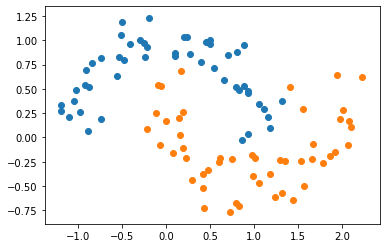

In [2]:
from sklearn import datasets
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma)) # rbf表示高斯核
    ])

In [4]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=1.0,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [5]:
def plot_decision_boundary(model, axis):
    """
    根据模型绘制决策边界
    """
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


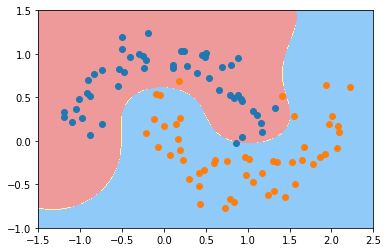

In [6]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # 和多项式差不多

## 调大gamma

In [7]:
svc = RBFKernelSVC(gamma=10)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=10,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


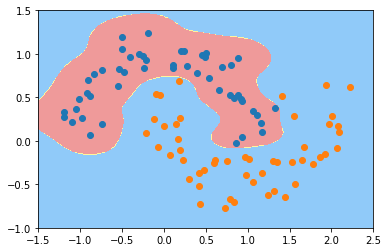

In [8]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # gamma取值越大，决策边界越收紧，可以看出太大不好，过拟合了

In [9]:
svc = RBFKernelSVC(gamma=100)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=100,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


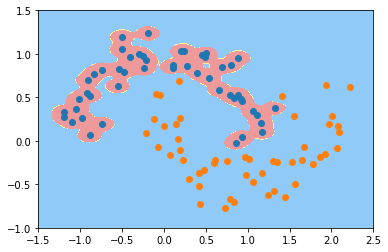

In [10]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # gamma取值越大，决策边界越收紧，可以看出太大不好，过拟合了

In [11]:
svc = RBFKernelSVC(gamma=0.5)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


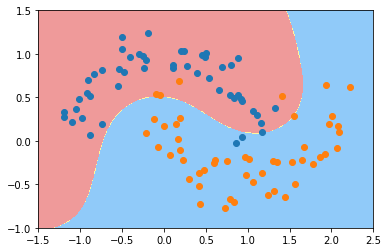

In [12]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # gamma越小，决策边界越松弛，当很小时，可以任务趋于无穷大成一条直线了

In [13]:
svc = RBFKernelSVC(gamma=0.1)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.1,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


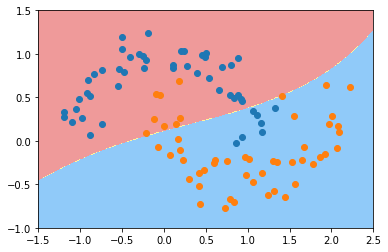

In [14]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # gamma越小，决策边界越松弛，当很小时，可以认为趋于无穷大成一条直线了，这时就欠拟合了

In [15]:
svc = RBFKernelSVC(gamma=0.01)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.01,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'


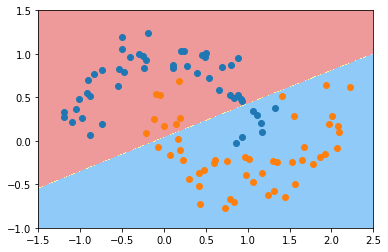

In [16]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show() # gamma越小，决策边界越松弛，当很小时，可以认为趋于无穷大成一条直线了，这时就欠拟合了

## gamma对模型的的影响是
+ gamma取值越大，决策边界越收紧，当很小时，会无限包紧样本点，这时就过拟合了
+ gamma取值越小，决策边界越松弛，当很小时，可以认为趋于无穷大成一条直线了，这时就欠拟合了